In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
tc = "BE00"
scopes = {"BE00":"BE00_DE00_LUG1_FR00_UK00_NL00","SE03":"FI00_SE02_DKW1_SE04_NOS0_SE03"}
dfs_prices = dict()
fixing_methods = ["endo_invest","TYNDP","0","no_fix"]
fm = fixing_methods[0]
for fm in fixing_methods:
    dfs_prices[fm] = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_tc_{tc}_{fm}_gs_{scopes[tc]}_100.csv")

# df_prices = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_{tc}_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_2 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_{tc}_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_3 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_4 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_5= pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")

# #df_prices_2 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
#df_prices_3 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")


In [73]:
df_filtered = df_prices[filtered_columns]
mean_values = df_filtered.mean()


# Convert column names to float for plotting
import_levels = [float(col) for col in mean_values.index]

# Create a scatter plot for mean values
plt.figure(figsize=(10, 6))
plt.scatter(import_levels, mean_values.values, color='blue', alpha=0.7)
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

NameError: name 'df_prices' is not defined

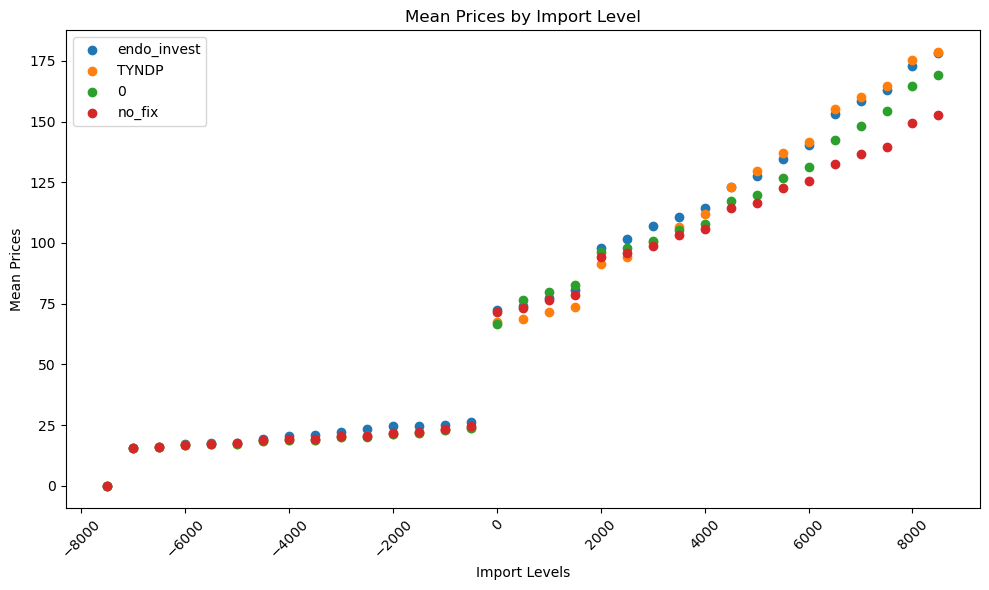

In [74]:
plt.figure(figsize=(10, 6))

# Loop through each DataFrame and plot mean values
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 500 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Calculate mean values for each import level
    mean_values = df_filtered.mean()
    
    # Convert column names to float for plotting
    import_levels = [float(col) for col in mean_values.index]
    
    # Create scatter plot for mean values
    plt.scatter(import_levels, mean_values.values, label=i)

plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
#plt.ylim((0,1000))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

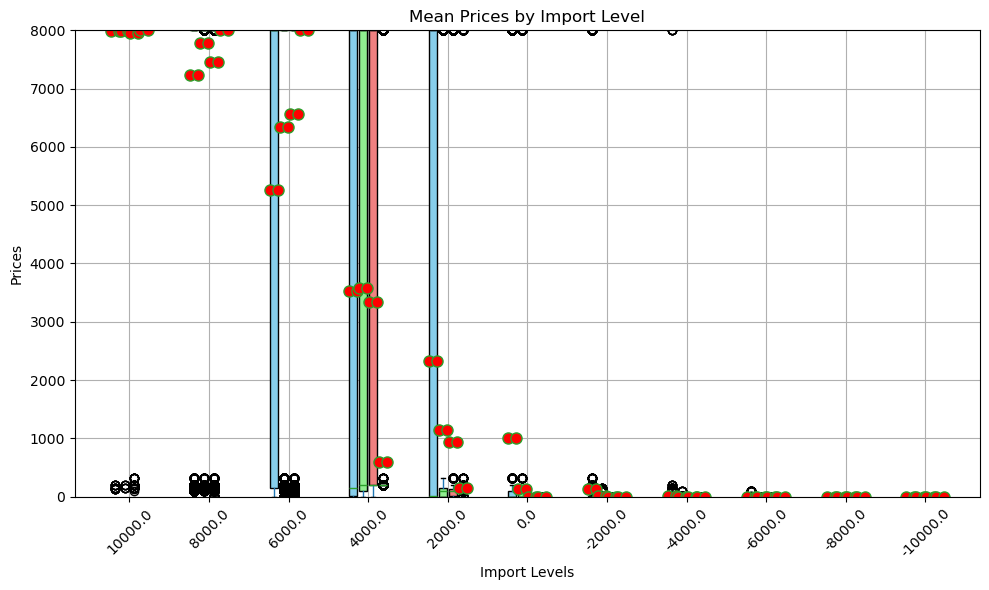

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k=0
n=8
colors = ['skyblue', 'lightgreen', 'lightcoral',"red"]  # Define colors for each DataFrame
labels = list(dfs_prices.keys())
handles = {} 
# Loop through each DataFrame and plot boxplots for each column
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 2000 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Create boxplot for each column
    boxplot = df_filtered.boxplot(positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns))], widths=0.1, patch_artist=True, boxprops=dict(facecolor=colors[k]), showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markersize=8), meanline=True)

    k += 1    
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
plt.ylim((0,8000))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()

TypeError: 'Axes' object is not subscriptable

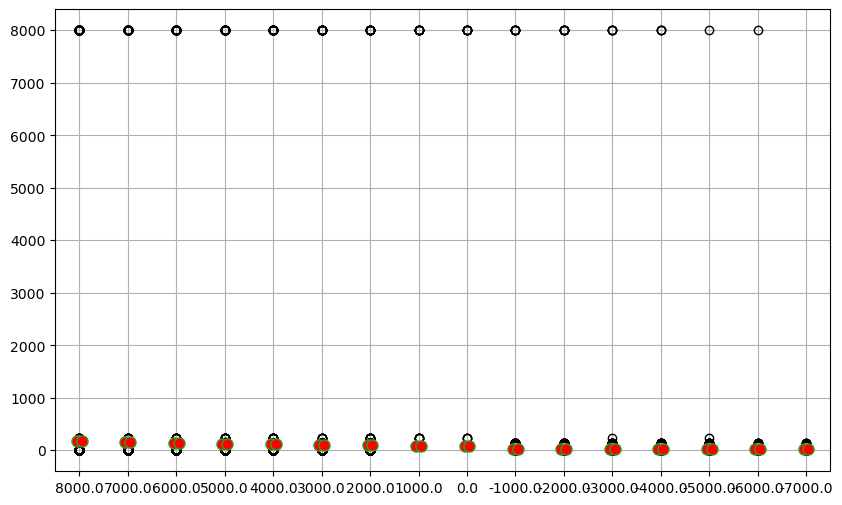

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k = 0
n = 8
colors = ['skyblue', 'lightgreen', 'lightcoral', "red"]  # Define colors for each DataFrame
labels = list(dfs_prices.keys())
handles = {} 
# Loop through each DataFrame and plot boxplots for each column
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 1000 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Create boxplot for each column
    boxplot_artist = df_filtered.boxplot(positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns))], widths=0.1, patch_artist=True, boxprops=dict(facecolor=colors[k]), showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markersize=8), meanline=True)
    # Add legend only for the first boxplot of each color
    if colors[k] not in handles:
        handles[colors[k]] = boxplot_artist['boxes'][0]

    k += 1    
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
plt.ylim((0,200))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()

# Add legend
plt.legend(handles=handles.values(), labels=labels, loc='upper left')

plt.show()


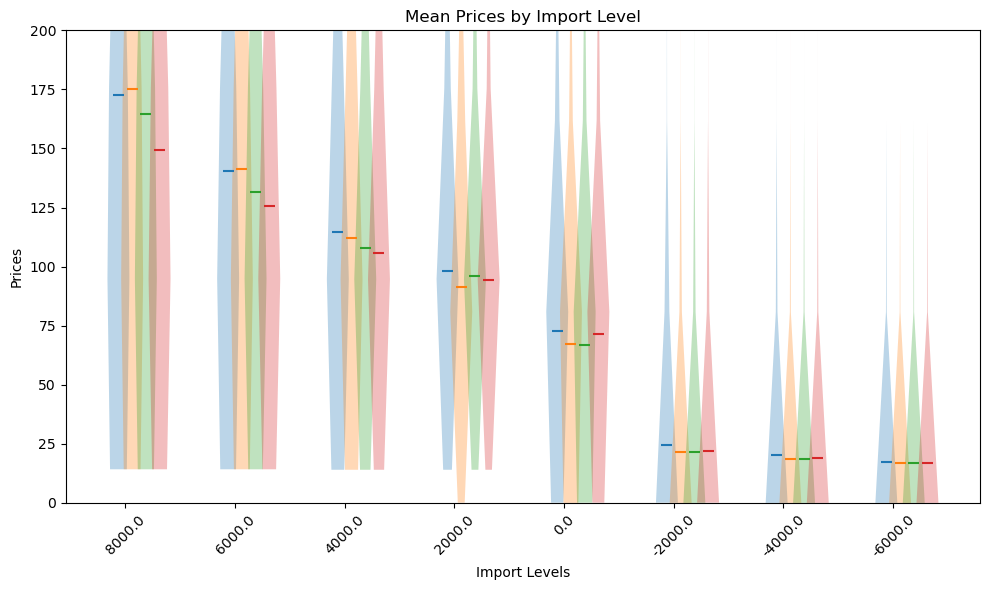

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k=0
n=8
colors = ['skyblue', 'lightgreen', 'lightcoral',"red"]  # Define colors for each DataFrame
labels = list(dfs_prices.keys())
handles = {} 
# Loop through each DataFrame and plot boxplots for each column
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 2000 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Create violin plot for each column
    violinplot = plt.violinplot(dataset=[df_filtered[col].dropna() for col in df_filtered.columns],
                                positions=[i - 1/(2*n) + k/n for i in range(len(filtered_columns))],
                                widths=0.2, showmeans=True, showextrema=False, showmedians=False)

    # # Customizing violin plot colors
    # for patch, color in zip(violinplot['bodies'], colors):
    #     patch.set_facecolor(color)
    
    k += 1    

plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
plt.ylim((0,200))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()


In [136]:
1/5*4-2*0.3,1/8*4-2*0.1875

(0.20000000000000007, 0.125)

In [ ]:
1/n * 4 - 2 * x = 1/n

In [ ]:
3/n - 2x = 0 